# Simple notebook to generate good plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data, Arguments

In [32]:
args = Arguments(dataset_name="MNIST")
args = Arguments(dataset_name="CIFAR10")
_,data_loader = load_data(args)

Files already downloaded and verified


In [33]:
datas = []
labels = []
for _, (images,label) in enumerate(data_loader):
    datas.append(images)
    labels.append(label)
datas = np.array(datas)
labels = np.array(labels)
print(datas.shape)
print(labels.shape)

(500, 100, 3, 32, 32)
(500, 100)


(20, 28, 28)


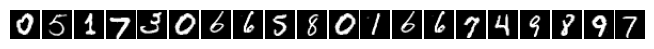

In [ ]:
# MNIST
B = 20
ids = np.random.randint(0, datas.shape[1], B)
images = datas[0, ids, 0]
print(images.shape)

fig,axs = plt.subplots(1, B)
for b in range(B):
    axs[b].imshow(images[b], cmap="gray")
    axs[b].axis("off")


fig.patch.set_visible(False)
fig.tight_layout(pad=0.2)
plt.show()

In [18]:
# MNIST
n,m, c, h,l = datas.shape

images = np.zeros((n*m, h, l))
true_labels = np.zeros(n*m)
for i in range(n):
    for j in range(m):
        images[i*j] = datas[i,j,0]
        true_labels[i*j] = labels[i,j]

dic = {i:[] for i in range(10)}
for i in range(len(images)):
    if images[i].min()!=images[i].max():
        dic[true_labels[i]].append(images[i])
for key in dic.keys():
    dic[key] = np.array(dic[key])
print([len(val) for key,val in dic.items()])

[2251, 2573, 2233, 2305, 2183, 2062, 2275, 2339, 2260, 2241]


[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


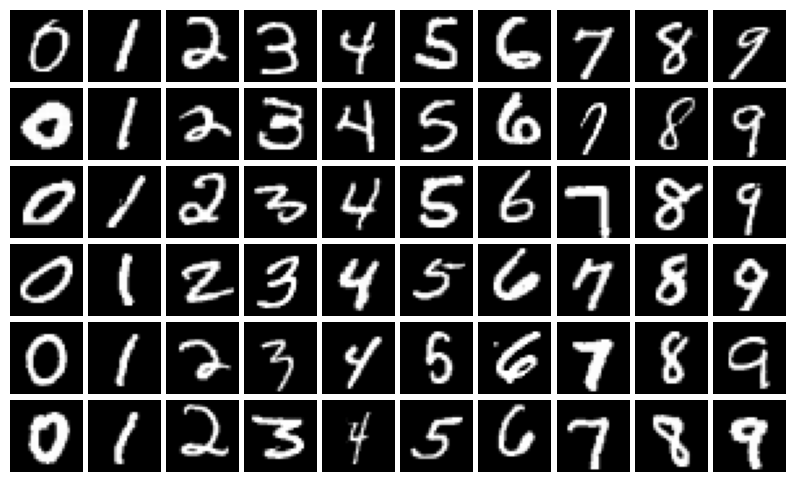

In [31]:
n=6

to_show = {}
for key in dic.keys():
    to_show[key] = dic[key][np.random.randint(0, len(dic[key]), n),:,:]
print([len(val) for key,val in to_show.items()])



fig, axs = plt.subplots(n,10,
    figsize=(10,n),
    gridspec_kw={'wspace': 0.08, 'hspace': 0.08}
)
for i in range(10):
    for j in range(n):
        axs[j,i].axis("off")
        axs[j,i].imshow(to_show[i][j], cmap="gray")


fig.patch.set_visible(False)
plt.show()

In [34]:
# CIFAR10
n,m, c, h,l = datas.shape

def create_img(sample):
    image = np.zeros((h,l,c))
    for j in range(3):
        image[:,:,j] = sample[j,:,:]
    return image

images = np.zeros((n*m, h, l, c))
true_labels = np.zeros(n*m)
for i in range(n):
    for j in range(m):
        images[i*j] = create_img(datas[i,j])
        true_labels[i*j] = labels[i,j]

dic = {i:[] for i in range(10)}
for i in range(len(images)):
    if images[i].min()!=images[i].max():
        dic[true_labels[i]].append(images[i])
for key in dic.keys():
    dic[key] = np.array(dic[key])
print([len(val) for key,val in dic.items()])

[1899, 1878, 1890, 1857, 1858, 1897, 1845, 1877, 1872, 1885]


[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


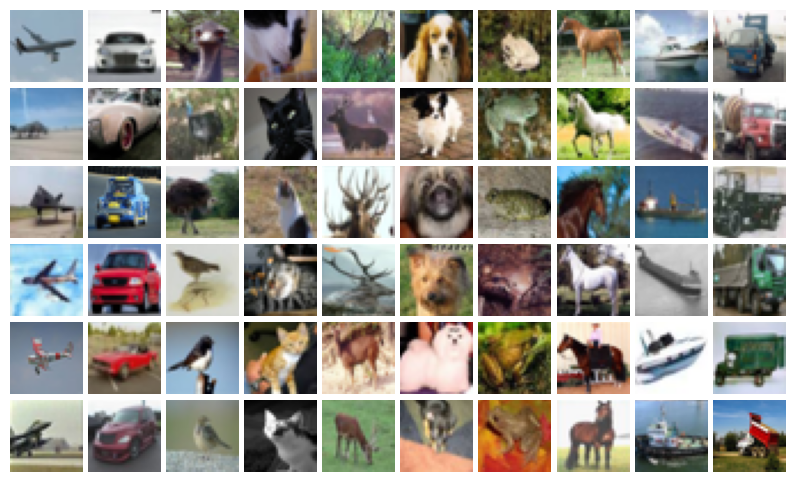

In [36]:
n=6

to_show = {}
for key in dic.keys():
    to_show[key] = dic[key][np.random.randint(0, len(dic[key]), n),:,:,:]
print([len(val) for key,val in to_show.items()])



fig, axs = plt.subplots(n,10,
    figsize=(10,n),
    gridspec_kw={'wspace': 0.08, 'hspace': 0.08}
)
for i in range(10):
    for j in range(n):
        axs[j,i].axis("off")
        axs[j,i].imshow((to_show[i][j]+1)/2)


fig.patch.set_visible(False)
plt.show()